# Exploración de Datos - Emociones en Tweets

Este notebook explora el dataset de emociones en tweets en español para entender las características de los datos antes del modelado.

## 1. Configuración y Carga de Datos

In [31]:
# Bibliotecas básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
from collections import Counter

# Configuración
warnings.filterwarnings('ignore')
plt.style.use('default')
sns.set_palette("husl")

In [32]:
# Cargar los datasets
data_path = '../data/es/'

train_df = pd.read_csv(data_path + 'train.tsv', sep='\t')
dev_df = pd.read_csv(data_path + 'dev.tsv', sep='\t')
test_df = pd.read_csv(data_path + 'test.tsv', sep='\t')

print("Información de los datasets:")
print(f"Entrenamiento: {len(train_df)} muestras")
print(f"Validación: {len(dev_df)} muestras")
print(f"Prueba: {len(test_df)} muestras")
print(f"Total: {len(train_df) + len(dev_df) + len(test_df)} muestras")

Información de los datasets:
Entrenamiento: 5723 muestras
Validación: 844 muestras
Prueba: 1656 muestras
Total: 8223 muestras


In [33]:
# Mostrar las primeras filas del dataset
print("Primeras 5 filas del dataset de entrenamiento:")
display(train_df.head())

print("\nInformación del dataset:")
print(train_df.info())

Primeras 5 filas del dataset de entrenamiento:


,id,event,tweet,offensive,emotion
0,a0c1a858-a9b8-4cb1-8a81-1602736ff5b8,GameOfThrones,La Gran Guerra de #JuegoDeTronos nos ha dejado...,NO,others
1,9b272817-a231-4f68-bdf4-3350d4919330,Venezuela,El golpe de Estado en #Venezuela está más lejo...,NO,others
2,4bd5b1e5-4b74-440a-82f4-c2567a241011,NotreDame,No tengo una foto en la catedral de #NotreDame...,NO,sadness
3,0bb9d7c9-d781-4684-890e-a94bfb50acc0,NotreDame,#NotreDame nunca llegue a visitar tan grandios...,NO,sadness
4,88749098-d539-4500-9209-0bbfae2b109c,GameOfThrones,A tomar por culo mi crush 😭😭😭😭😭#JuegoDeTronos,OFF,sadness



Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5723 entries, 0 to 5722
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         5723 non-null   object
 1   event      5723 non-null   object
 2   tweet      5723 non-null   object
 3   offensive  5723 non-null   object
 4   emotion    5723 non-null   object
dtypes: object(5)
memory usage: 223.7+ KB
None


## 2. Análisis de Distribución de Emociones

In [34]:
# Contar emociones en cada dataset
train_emotions = train_df['emotion'].value_counts()
dev_emotions = dev_df['emotion'].value_counts()
test_emotions = test_df['emotion'].value_counts()

print("Distribución de emociones:")
print("\nEntrenamiento:")
print(train_emotions)
print("\nValidación:")
print(dev_emotions)
print("\nPrueba:")
print(test_emotions)

Distribución de emociones:

Entrenamiento:
emotion
others      2800
joy         1227
sadness      693
anger        589
surprise     238
disgust      111
fear          65
Name: count, dtype: int64

Validación:
emotion
others      414
joy         181
sadness     104
anger        85
surprise     35
disgust      16
fear          9
Name: count, dtype: int64

Prueba:
emotion
others      814
joy         354
sadness     199
anger       168
surprise     67
disgust      33
fear         21
Name: count, dtype: int64


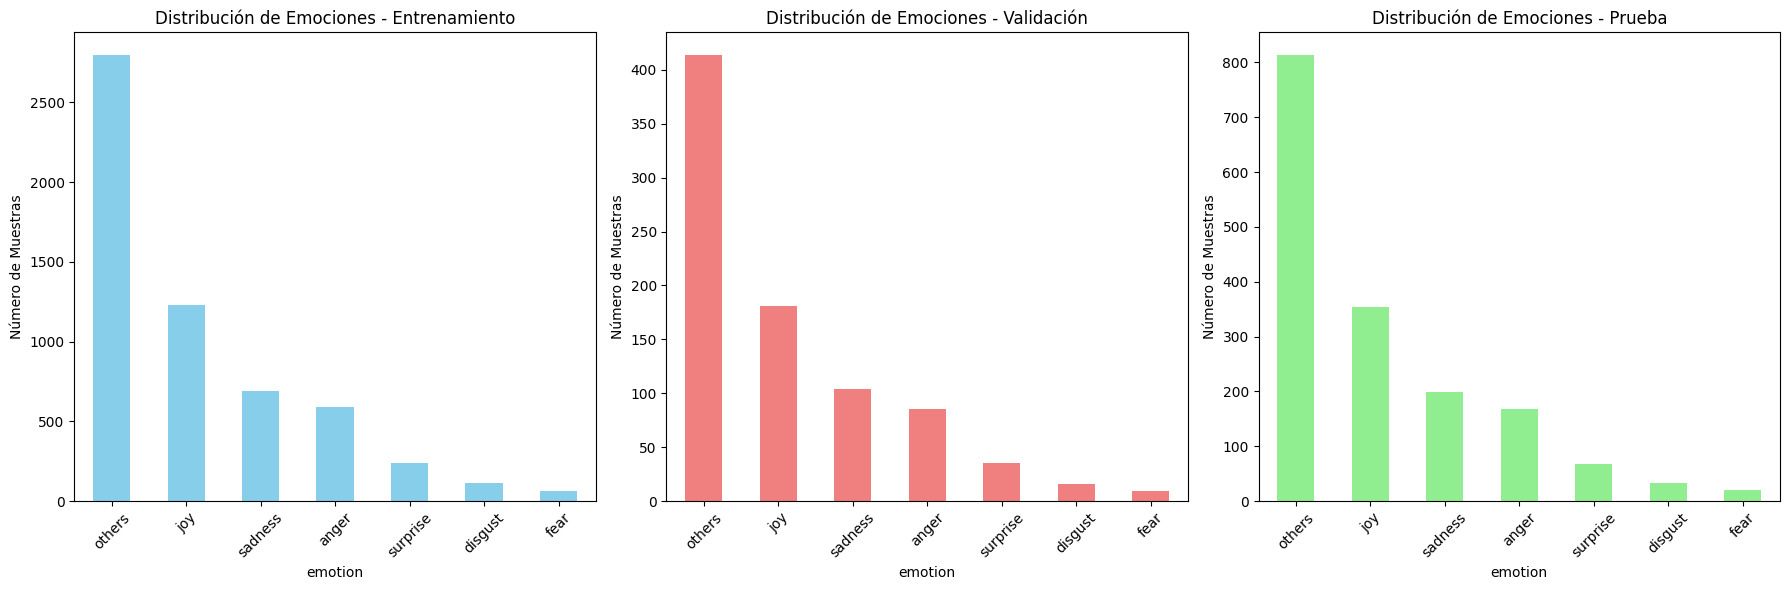


Mapeo de emociones:
  others: 0
  joy: 1
  sadness: 2
  anger: 3
  surprise: 4
  disgust: 5
  fear: 6

Número total de clases: 7


In [35]:
# Visualización de la distribución
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Dataset de entrenamiento
train_emotions.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Distribución de Emociones - Entrenamiento')
axes[0].set_ylabel('Número de Muestras')
axes[0].tick_params(axis='x', rotation=45)

# Dataset de validación
dev_emotions.plot(kind='bar', ax=axes[1], color='lightcoral')
axes[1].set_title('Distribución de Emociones - Validación')
axes[1].set_ylabel('Número de Muestras')
axes[1].tick_params(axis='x', rotation=45)

# Dataset de prueba
test_emotions.plot(kind='bar', ax=axes[2], color='lightgreen')
axes[2].set_title('Distribución de Emociones - Prueba')
axes[2].set_ylabel('Número de Muestras')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Crear mapeo de emociones
emotion_to_idx = {emotion: idx for idx, emotion in enumerate(train_emotions.index)}
num_classes = len(emotion_to_idx)

print(f"\nMapeo de emociones:")
for emotion, idx in emotion_to_idx.items():
    print(f"  {emotion}: {idx}")
print(f"\nNúmero total de clases: {num_classes}")

## 3. Análisis de Texto

In [36]:
# Análisis de longitud de tweets
train_df['tweet_length'] = train_df['tweet'].str.len()
train_df['word_count'] = train_df['tweet'].str.split().str.len()

print("Estadísticas de longitud de tweets:")
print(f"Longitud promedio: {train_df['tweet_length'].mean():.1f} caracteres")
print(f"Longitud mediana: {train_df['tweet_length'].median():.1f} caracteres")
print(f"Longitud mínima: {train_df['tweet_length'].min()} caracteres")
print(f"Longitud máxima: {train_df['tweet_length'].max()} caracteres")

print("\nEstadísticas de número de palabras:")
print(f"Palabras promedio: {train_df['word_count'].mean():.1f}")
print(f"Palabras mediana: {train_df['word_count'].median():.1f}")
print(f"Palabras mínimas: {train_df['word_count'].min()}")
print(f"Palabras máximas: {train_df['word_count'].max()}")

Estadísticas de longitud de tweets:
Longitud promedio: 150.9 caracteres
Longitud mediana: 137.0 caracteres
Longitud mínima: 32 caracteres
Longitud máxima: 304 caracteres

Estadísticas de número de palabras:
Palabras promedio: 22.3
Palabras mediana: 20.0
Palabras mínimas: 4
Palabras máximas: 59


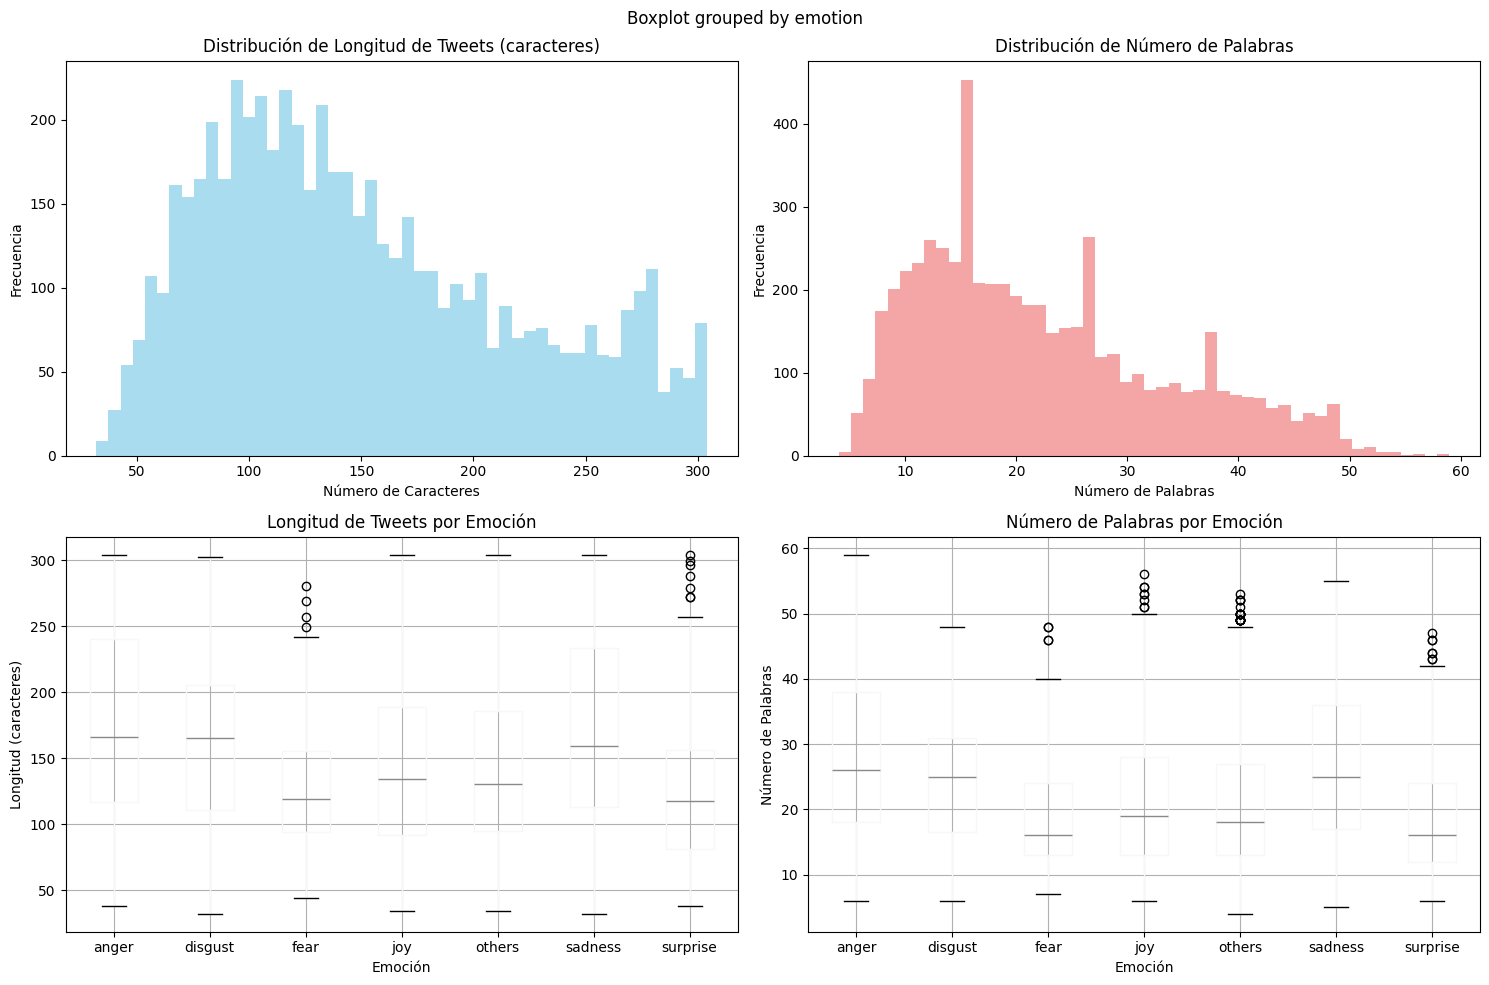

In [26]:
# Visualización de distribuciones
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Distribución de longitud de caracteres
axes[0, 0].hist(train_df['tweet_length'], bins=50, alpha=0.7, color='skyblue')
axes[0, 0].set_title('Distribución de Longitud de Tweets (caracteres)')
axes[0, 0].set_xlabel('Número de Caracteres')
axes[0, 0].set_ylabel('Frecuencia')

# Distribución de número de palabras
axes[0, 1].hist(train_df['word_count'], bins=50, alpha=0.7, color='lightcoral')
axes[0, 1].set_title('Distribución de Número de Palabras')
axes[0, 1].set_xlabel('Número de Palabras')
axes[0, 1].set_ylabel('Frecuencia')

# Longitud por emoción
train_df.boxplot(column='tweet_length', by='emotion', ax=axes[1, 0])
axes[1, 0].set_title('Longitud de Tweets por Emoción')
axes[1, 0].set_xlabel('Emoción')
axes[1, 0].set_ylabel('Longitud (caracteres)')

# Número de palabras por emoción
train_df.boxplot(column='word_count', by='emotion', ax=axes[1, 1])
axes[1, 1].set_title('Número de Palabras por Emoción')
axes[1, 1].set_xlabel('Emoción')
axes[1, 1].set_ylabel('Número de Palabras')

plt.tight_layout()
plt.show()

## 4. Análisis de Vocabulario

In [37]:
# Función de limpieza básica para análisis
def clean_text_basic(text):
    if pd.isna(text):
        return ""
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#(\w+)', r'\1', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

# Aplicar limpieza para análisis de vocabulario
train_df['clean_tweet'] = train_df['tweet'].apply(clean_text_basic)

# Contar palabras más frecuentes
all_words = []
for tweet in train_df['clean_tweet']:
    if tweet:
        all_words.extend(tweet.split())

word_freq = Counter(all_words)
print(f"Vocabulario total: {len(word_freq)} palabras únicas")
print(f"\nPalabras más frecuentes:")
for word, freq in word_freq.most_common(20):
    print(f"  {word}: {freq}")

Vocabulario total: 15067 palabras únicas

Palabras más frecuentes:
  de: 6088
  la: 3811
  que: 3779
  el: 3482
  y: 2687
  en: 2654
  a: 2522
  user: 2001
  no: 1627
  los: 1461
  es: 1386
  por: 1153
  un: 1153
  se: 1126
  con: 1068
  lo: 1028
  del: 1012
  para: 978
  juegodetronos: 842
  una: 830


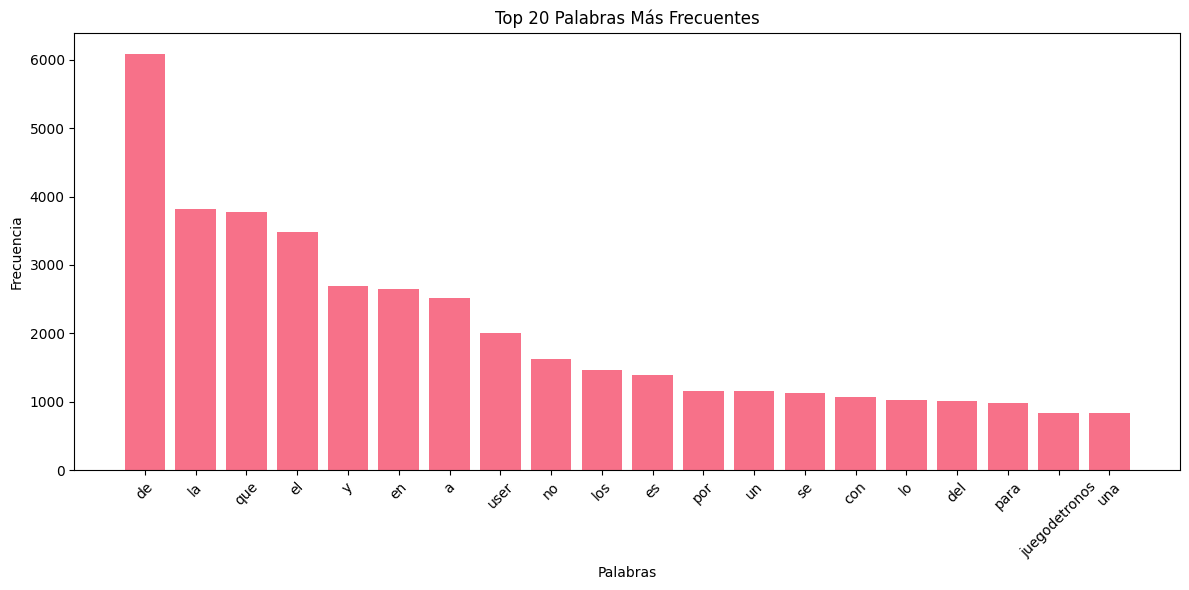

In [28]:
# Visualización de frecuencias de palabras
top_words = dict(word_freq.most_common(20))

plt.figure(figsize=(12, 6))
plt.bar(top_words.keys(), top_words.values())
plt.title('Top 20 Palabras Más Frecuentes')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 5. Ejemplos por Emoción

In [29]:
# Mostrar ejemplos de cada emoción
print("Ejemplos de tweets por emoción:")
for emotion in train_emotions.index:
    print(f"\n--- {emotion.upper()} ---")
    examples = train_df[train_df['emotion'] == emotion]['tweet'].head(3)
    for i, tweet in enumerate(examples, 1):
        print(f"{i}. {tweet}")

Ejemplos de tweets por emoción:

--- OTHERS ---
1. La Gran Guerra de #JuegoDeTronos nos ha dejado muchos momentos para el recuerdo y unas cuantas dudas https://t.co/UE7lCgLSez https://t.co/OO3tjUR34c
2. El golpe de Estado en #Venezuela está más lejos que el final de Elif. #VenezuelaEnBatallaYVictoria #VenezuelaNoSeRinde #VenezuelaHoy
3. Bueno declaro Moscú la nueva y renovada Messigrado. #BarçaLFC #ChampionsLeague

--- JOY ---
1. ARYA DE MI VIDA. ERES MAS ÉPICA QUE EL GOL DE INIESTA JODER #JuegodeTronos #VivePoniente
2. ¡Nos alegramos mucho de que te haya gustado! ¡Feliz #DiadelLibro https://t.co/8fu9WW11gy
3. Servicio público y literario En la 45° Feria Internacional del Libro en Buenos Aires se puede encontrar esta joya a sólo 150 pesos argentinos (3,5 usd aprox.) #DíaDelLibro #JoséAntonioRamosSucre #PoesíaVenezolana #LiteraturaLatinoamericana ❧ #LosCuadernosDelDestierro https://t.co/MhAHn0dLQE

--- SADNESS ---
1. No tengo una foto en la catedral de #NotreDame pero tengo esta secuenc

## 6. Análisis por Evento

Distribución de eventos:
event
GameOfThrones      837
NotreDame          834
SpainElection      831
Venezuela          824
ChampionsLeague    813
WorldBookDay       775
GretaThunberg      416
LaLiga             393
Name: count, dtype: int64

Distribución de emociones por evento:


emotion,anger,disgust,fear,joy,others,sadness,surprise
event,,,,,,,
ChampionsLeague,49,12,1,234,466,19,32
GameOfThrones,79,6,17,187,362,65,121
GretaThunberg,25,2,1,52,324,5,7
LaLiga,14,1,0,122,240,6,10
NotreDame,103,24,2,42,191,452,20
SpainElection,125,24,29,213,372,39,29
Venezuela,185,39,15,67,422,86,10
WorldBookDay,9,3,0,310,423,21,9


<Figure size 1200x800 with 0 Axes>

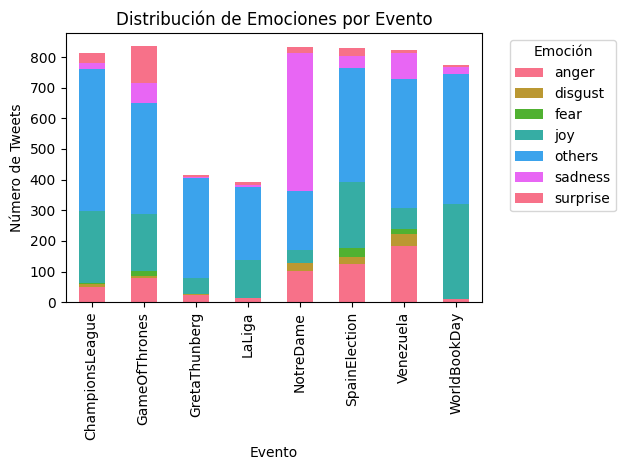

In [38]:
# Análisis de distribución por evento
if 'event' in train_df.columns:
    print("Distribución de eventos:")
    event_counts = train_df['event'].value_counts()
    print(event_counts)
    
    # Distribución de emociones por evento
    print("\nDistribución de emociones por evento:")
    emotion_by_event = pd.crosstab(train_df['event'], train_df['emotion'])
    display(emotion_by_event)
    
    # Visualización
    plt.figure(figsize=(12, 8))
    emotion_by_event.plot(kind='bar', stacked=True)
    plt.title('Distribución de Emociones por Evento')
    plt.xlabel('Evento')
    plt.ylabel('Número de Tweets')
    plt.legend(title='Emoción', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
else:
    print("No hay columna 'event' en el dataset")

## 7. Resumen de Insights

### Características del Dataset:
1. **Tamaño del dataset**: 8,223 tweets totales (5,723 entrenamiento, 844 validación, 1,656 prueba)
2. **Desbalance de clases**: La distribución de emociones no es uniforme:
   - **others**: 49% del dataset (clase dominante)
   - **joy**: 21% (segunda más frecuente)
   - **sadness**: 12%
   - **anger**: 10%
   - **surprise**: 4%
   - **disgust**: 2%
   - **fear**: 1% (clase minoritaria)
3. **Longitud de tweets**: 
   - Promedio: 150.9 caracteres
   - Mediana: 137.0 caracteres
   - Rango: 32-304 caracteres
4. **Número de palabras**:
   - Promedio: 22.3 palabras
   - Mediana: 20.0 palabras
   - Rango: 4-59 palabras
5. **Vocabulario**: Rico y diverso con 15,067 palabras únicas
6. **Idioma**: Español con características típicas de redes sociales
7. **Eventos**: 8 eventos diferentes relacionados con:
   - GameOfThrones (837 tweets)
   - NotreDame (834 tweets) 
   - SpainElection (831 tweets)
   - Venezuela (824 tweets)
   - ChampionsLeague (813 tweets)
   - WorldBookDay (775 tweets)
   - GretaThunberg (416 tweets)
   - LaLiga (393 tweets)

### Consideraciones para el Modelado:
1. **Manejo del desbalance**: Crítico implementar técnicas como:
   - Class weights (especialmente para "fear" que representa solo 1%)
   - Oversampling/undersampling
   - Stratified sampling
2. **Preprocesamiento**: 
   - Limpieza de URLs, menciones (@user) y caracteres especiales
   - Normalización de hashtags (ej: #JuegoDeTronos)
   - Manejo de emojis y caracteres especiales
3. **Longitud variable**: 
   - Implementar padding apropiado (max_length ~300)
   - Considerar truncamiento para secuencias muy largas
4. **Vocabulario**: 
   - Construir vocabulario con threshold de frecuencia
   - Manejar palabras OOV (Out-of-Vocabulary)
   - Considerar subword tokenization para mejor cobertura
5. **Diversidad de eventos**: 
   - El modelo debe generalizar bien entre diferentes contextos
   - Validar que no haya bias específico por evento
6. **Distribución por evento**:
   - Algunos eventos tienen distribuciones emocionales muy específicas
   - NotreDame muestra alta proporción de tristeza
   - Venezuela tiene más distribución de ira y otros
   - Considerar esto para validación cruzada